<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Justin!

I'm happy to review your project today  🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments: </div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall, well done! I can see that a lot of effort has been put in. Your project already looks really good, and you've achieved impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better (in red boxes with the title - `Reviewer's comment v1`). 
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for going an extra mile and enhancing your project. There are no issues left, so your project has been accepted. I wish you engaging projects in the upcoming sprints! ☘️
    
PS: As a final note, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  
    
Another great self-paced course that covers basic concepts in probability and statistics - Probability and Statistics by Stanford Online or you could check this one [An Introduction to Statistical Learning with Applications in R](https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/) 🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import random

from functools import reduce
from scipy import stats


## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
You could also apply `try/except` structure with different paths so it will work with both local and remote data paths. 
    
You could check additional information here: https://www.w3schools.com/python/python_try_except.asp
    
Here's a simple example of how you can apply a try/except structure to handle both local and remote data paths:

```
local_path = 'path/to/local/orders.csv'
users_df = '/datasets/megaline_users.csv'

try:
    users_df = pd.read_csv(local_path, sep=';')
except FileNotFoundError:
    users_df = pd.read_csv(tripleten_path, sep=',')
```

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()
display(plans_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [4]:
# Print a sample of data for plans
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


From my observation it looks at though there may be some issues as far as datatypes are concerned. There are two columns that refer to usd where the values are integers (usd_monthly pay | usd_per_gb) and two where the values are floats (usd_per_message | usd_per_minute). It might be better for choose one or the other for values involving usd. I'll be choosing floats.

It also seems as though the values of the "plan_name" columns are objects when they should be strings. 

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great data overview and correct conclusions. 

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plans_df['usd_monthly_pay'] = plans_df['usd_monthly_pay'].astype(float)
plans_df['usd_per_gb'] = plans_df['usd_per_gb'].astype(float)
plans_df['plan_name'] = plans_df['plan_name'].astype(str)
plans_df.info()
display(plans_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [6]:
#adding a "gb_per_month_included" column for for anyobdy uninterested in doing the calculations
plans_df.insert(loc=plans_df.columns.get_loc('mb_per_month_included') + 1,column='gb_per_month_included', value=plans_df['mb_per_month_included']/1000)


In [7]:
display(plans_df)

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.36,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30.72,3000,70.0,7.0,0.01,0.01,ultimate


## Users

In [8]:
# Print the general/summary information about the users' DataFrame
users_df.info()
display(users_df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [9]:
# Print a sample of data for users
users_df.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

When examining the data, I'm noticing some things in the city column that may confusing. There are multiple hyphenated cities in the values. Looking at what I'm being ased to do, it seems as though the cities aren't important and I really only need to know/work with which state an individual is from. Based on that I'll be separating the cities into a different column and dropping that column to clean the data

Beyond that, the churn column is full of NaN values. These I'd fill with "Unknown" as we have in previous projects. 

When it comes to the city issue My initial thought is to create new columns to hold additional city/state combinations that may exist in rows; This way the data looks cleaner, the strings are shorter and I won't be losing any information that might be useful in the future. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [10]:
#splitting the cities into two new columns
users_df[['city','state']] = users_df['city'].str.split(',', expand=True)
#filling missing values with "Unknown"
users_df.fillna("Unknown", inplace=True)
display(users_df.head(20))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,Unknown,GA MSA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,Unknown,WA MSA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,Unknown,NV MSA
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,Unknown,OK MSA
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,Unknown,WA MSA
5,1005,Livia,Shields,31,Dallas-Fort Worth-Arlington,2018-11-29,surf,Unknown,TX MSA
6,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,CA MSA
7,1007,Eusebio,Welch,42,Grand Rapids-Kentwood,2018-07-11,surf,Unknown,MI MSA
8,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,Unknown,FL MSA
9,1009,Gerry,Little,19,San Jose-Sunnyvale-Santa Clara,2018-04-22,surf,Unknown,CA MSA


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()
display(calls_df.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [12]:
# Print a sample of data for calls

calls_df.sample()

,id,user_id,call_date,duration
7138,1033_154,1033,2018-12-12,8.68


Possible issues: 
- the values in the id column are being represented by strings when it should instead be ints much like the user_id_column
- call values are represented as floats when they should be rounded up and shown as ints
- For the sake of clarity, the "id" column probably shouldn't also include the user id and an underscore
- "id" title should likely be changed to "call_id"


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
#renaming the "id" column to "call_id"
calls_df.rename(columns={'id': 'call_id'}, inplace=True)
#rounding up call duration and changing them from floats to ints
calls_df['duration'] = np.ceil(calls_df['duration']).astype(int)
display(calls_df.head(20))

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
5,1000_388,1000,2018-12-31,3
6,1000_510,1000,2018-12-27,6
7,1000_521,1000,2018-12-28,15
8,1000_530,1000,2018-12-28,6
9,1000_544,1000,2018-12-26,5


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Good that you did not forget about data rounding. Also, great choice of np.ceil () function :)


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
calls_df['call_id'] = calls_df['call_id'].apply(lambda x: x.split('_')[-1] if '_' in x else x)
calls_df['call_id'].astype(int)
calls_df.sample()

,call_id,user_id,call_date,duration
134678,6,1489,2018-10-23,6


## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame

messages_df.info()
display(messages_df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [16]:
# Print a sample of data for messages
messages_df.sample()

,id,user_id,message_date
7321,1059_194,1059,2018-11-28


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Possible issues: 
- Much like with the calls dataframe I feel as though I'd want to change the "id" column values to ints as well as renaming the title of the column from "id" to "message_id"


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
messages_df.rename(columns={'id': 'message_id'}, inplace=True)
messages_df['message_id'] = messages_df['message_id'].apply(lambda x: x.split('_')[-1] if '_' in x else x)
messages_df['message_id'].astype(int)
messages_df.sample()

,message_id,user_id,message_date
33694,116,1212,2018-11-20


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [18]:
# Print the general/summary information about the internet DataFrame
internet_df.info()
display(internet_df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [19]:
# Print a sample of data for the internet traffic
internet_df.sample()


,id,user_id,session_date,mb_used
5026,1028_602,1028,2018-08-02,324.76


Possible issues
- mb_used needs rounding
- id column name and values 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [20]:
internet_df.rename(columns={'id': 'net_id'}, inplace=True)
internet_df['net_id'] = internet_df['net_id'].apply(lambda x: x.split('_')[-1] if '_' in x else x)
internet_df['mb_used'] = np.ceil(internet_df['mb_used']).astype(int)
display(internet_df.head(20))

,net_id,user_id,session_date,mb_used
0,13,1000,2018-12-29,90
1,204,1000,2018-12-31,0
2,379,1000,2018-12-28,661
3,413,1000,2018-12-26,271
4,442,1000,2018-12-27,881
5,0,1001,2018-08-24,285
6,3,1001,2018-12-09,657
7,4,1001,2018-11-04,17
8,10,1001,2018-11-27,136
9,15,1001,2018-12-13,762


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [21]:
#adding a "gb_used" column for for anyobdy uninterested in doing the calculations
internet_df.insert(loc=internet_df.columns.get_loc('mb_used') + 1,column='gb_used', value=internet_df['mb_used']/1000)

In [22]:
display(internet_df.head(20))

,net_id,user_id,session_date,mb_used,gb_used
0,13,1000,2018-12-29,90,0.090
1,204,1000,2018-12-31,0,0.000
2,379,1000,2018-12-28,661,0.661
3,413,1000,2018-12-26,271,0.271
4,442,1000,2018-12-27,881,0.881
5,0,1001,2018-08-24,285,0.285
6,3,1001,2018-12-09,657,0.657
7,4,1001,2018-11-04,17,0.017
8,10,1001,2018-11-27,136,0.136
9,15,1001,2018-12-13,762,0.762


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [23]:
# Print out the plan conditions and make sure they are clear for you
display(plans_df)

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.36,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30.72,3000,70.0,7.0,0.01,0.01,ultimate


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. 

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [24]:
display(calls_df.sample())

,call_id,user_id,call_date,duration
66284,142,1240,2018-10-21,7


In [25]:
# Calculate the number of calls made by each user per month. Save the result.

#ensure that the date is in dateime format
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

#groupby and aggregate
call_stats = calls_df.groupby(['user_id','month']).agg({'duration': ['count','sum']}).astype(int).reset_index()

#flatten index
call_stats.columns = [col[0] if col[1]=='' else '_'.join(col) for col in call_stats.columns.values]

call_stats.sample()

,user_id,month,duration_count,duration_sum
2255,1499,2018-10,53,385


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:


```
# Group by and aggregate
result = calls_df.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()

# Flatten the MultiIndex in columns
result.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in result.columns.values]
result
```

In [26]:
messages_df.sample()

,message_id,user_id,message_date
9535,715,1069,2018-12-18


In [27]:
# Calculate the number of messages sent by each user per month. Save the result.

#ensure that the date is in dateime format
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

#counting messages per month
num_messages = messages_df.groupby(['user_id','month'])['message_id'].count().to_frame().reset_index()

num_messages.rename(columns={'message_id': 'messages_sent'},inplace=True)

display(num_messages)

,user_id,month,messages_sent
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
Everything is correct here, but it is always helpful to double-check whether we indeed have data within one year/time period. If not, then selecting and aggregating data by the month number will cause an issue. It is safer to use datetime64[M], which provides a complete date.

Additionally, you could achieve the same using the following code: 
    
```    
calls['call_date'].dt.to_period('M')
```

In [28]:
internet_df.sample()

,net_id,user_id,session_date,mb_used,gb_used
9774,194,1050,2018-03-31,0,0.0


In [29]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

#ensure that the date is in dateime format
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df['month'] = internet_df['session_date'].dt.to_period('M')


#calculating the amount of data used per month
net_volMB = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().astype(int).to_frame().reset_index()
net_volGB = internet_df.groupby(['user_id', 'month'])['gb_used'].sum().astype(int).to_frame().reset_index()

display(net_volGB.sample())

,user_id,month,gb_used
787,1164,2018-07,13


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [30]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

#combining the dataframes
data_frames = [df.reset_index() for df in [call_stats, num_messages, net_volMB, net_volGB]]
merged_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames)

#filling the missing values in num_messages with 0
merged_data.fillna(0,inplace=True)
merged_data.astype(int)


,index_x,user_id,month,duration_count,duration_sum,index_y,messages_sent,index_x,mb_used,index_y,gb_used
0,0,1000,587,16,124,0,11,0,1903,0,1
1,1,1001,583,27,182,1,30,1,6929,1,6
2,2,1001,584,49,315,2,44,2,13333,2,13
3,3,1001,585,65,393,3,53,3,22356,3,22
4,4,1001,586,64,426,4,36,4,18524,4,18
...,...,...,...,...,...,...,...,...,...,...,...
2288,0,1349,587,0,0,1303,61,1607,13052,1607,13
2289,0,1361,580,0,0,1339,2,1664,1523,1664,1
2290,0,1482,585,0,0,1762,2,0,0,0,0
2291,0,1108,587,0,0,0,0,506,235,506,0


In [31]:
display(merged_data.head(20))

,index_x,user_id,month,duration_count,duration_sum,index_y,messages_sent,index_x,mb_used,index_y,gb_used
0,0.0,1000,2018-12,16.0,124.0,0.0,11.0,0.0,1903.0,0.0,1.0
1,1.0,1001,2018-08,27.0,182.0,1.0,30.0,1.0,6929.0,1.0,6.0
2,2.0,1001,2018-09,49.0,315.0,2.0,44.0,2.0,13333.0,2.0,13.0
3,3.0,1001,2018-10,65.0,393.0,3.0,53.0,3.0,22356.0,3.0,22.0
4,4.0,1001,2018-11,64.0,426.0,4.0,36.0,4.0,18524.0,4.0,18.0
5,5.0,1001,2018-12,56.0,412.0,5.0,44.0,5.0,19398.0,5.0,19.0
6,6.0,1002,2018-10,11.0,59.0,6.0,15.0,6.0,6559.0,6.0,6.0
7,7.0,1002,2018-11,55.0,386.0,7.0,32.0,7.0,19364.0,7.0,19.0
8,8.0,1002,2018-12,47.0,384.0,8.0,41.0,8.0,14416.0,8.0,14.0
9,9.0,1003,2018-12,149.0,1104.0,9.0,50.0,9.0,27069.0,9.0,27.0


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Here you need to use another way of joining tables (change the how parameter). Now, if users made calls, but did not send messages, it will not be tracked in the new table (the same with the Internet). This will happen because with the left method we take all the keys from the left table and look for their matches in the right table. If there are unique values in the right table, we will ignore them. For this task, we need to take all the records from the right and left tables. You can see about connections here https://www.freecodecamp.org/news/sql-join-types-inner-join-vs-outer-join-example/#:~:text=The biggest difference between an,table in the resulting table.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

Indeed `how=outer` is a correct way of keeping all data. 

In [32]:
#adding the plan data

#condensing the users dataframe to ONLY what is needed for now. 
cUsers = users_df.drop(['first_name','last_name','age','city','reg_date','churn_date','state'],axis=1)

#adding plan names
merged_data = merged_data.merge(cUsers,on='user_id')


In [33]:
display(plans_df)

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.36,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30.72,3000,70.0,7.0,0.01,0.01,ultimate


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [34]:
full_merge = merged_data.merge(plans_df, left_on='plan', right_on='plan_name')
full_merge.sample()

,index_x,user_id,month,duration_count,duration_sum,index_y,messages_sent,index_x,mb_used,index_y,...,plan,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
2165,2112.0,1466,2018-11,28.0,202.0,1700.0,38.0,2141.0,13213.0,2141.0,...,surf,50,15360,15.36,500,20.0,10.0,0.03,0.03,surf


In [35]:
# Calculate the extra minutes, messages, and data used by each user
full_merge['extra_minutes'] = full_merge['duration_sum'] - full_merge['minutes_included']
full_merge['extra_messages'] = full_merge['messages_sent'] - full_merge['messages_included']

# For data, round up the total for the month to the nearest gigabyte before calculating the extra data
full_merge['mb_used_rounded'] = np.ceil(full_merge['mb_used'] / 1024) * 1024
full_merge['extra_data'] = full_merge['mb_used_rounded'] - full_merge['mb_per_month_included']



# Replace negative values with 0 (since negative values mean the user didn't exceed their plan)
full_merge['extra_minutes'] = full_merge['extra_minutes'].apply(lambda x: max(x, 0))
full_merge['extra_messages'] = full_merge['extra_messages'].apply(lambda x: max(x, 0))
full_merge['extra_data'] = full_merge['extra_data'].apply(lambda x: max(x, 0))

# Calculate the extra cost for minutes, messages, and data
full_merge['extra_minutes_cost'] = full_merge['extra_minutes'] * full_merge['usd_per_minute']
full_merge['extra_messages_cost'] = full_merge['extra_messages'] * full_merge['usd_per_message']
full_merge['extra_data_cost'] = (full_merge['extra_data'] / 1024) * full_merge['usd_per_gb']

# Round the costs to 2 decimal places
full_merge['extra_data_cost'] = full_merge['extra_data_cost'].round(2)
full_merge['extra_messages_cost'] = full_merge['extra_messages_cost'].round(2)

# Calculate the total cost
full_merge['total_cost'] = full_merge['usd_monthly_pay'] + full_merge['extra_minutes_cost'] + full_merge['extra_messages_cost'] + full_merge['extra_data_cost']

# Round the total cost to 2 decimal places
full_merge['total_cost'] = full_merge['total_cost'].round(2)

In [36]:
full_merge.sample()

,index_x,user_id,month,duration_count,duration_sum,index_y,messages_sent,index_x,mb_used,index_y,...,usd_per_minute,plan_name,extra_minutes,extra_messages,mb_used_rounded,extra_data,extra_minutes_cost,extra_messages_cost,extra_data_cost,total_cost
1712,1421.0,1316,2018-10,28.0,228.0,1167.0,59.0,1449.0,19577.0,1449.0,...,0.03,surf,0.0,9.0,20480.0,5120.0,0.0,0.27,50.0,70.27


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
I see that some columns are hidden. It is possible to disable this and display all columns/rows with:
    
```
pd.set_option ('display.max_columns', None)
```

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Please note that for web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>

Everything is correct here.

Btw it is also possible to make the calculation of revenue a bit different `np.where` - https://numpy.org/doc/stable/reference/generated/numpy.where.html
    
```
np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read it here: https://www.pythonpool.com/numpy-clip/
    

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

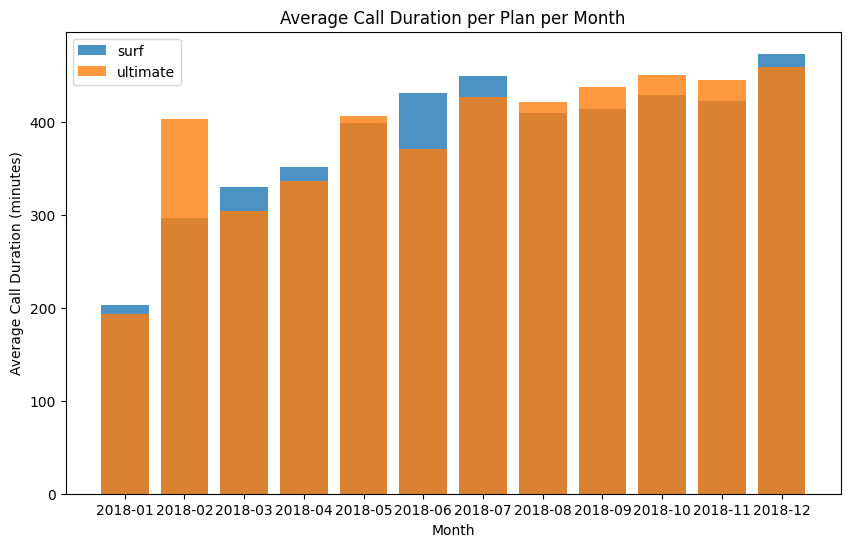

In [37]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_calls = full_merge.groupby(['month','plan'])['duration_sum'].mean().reset_index()
#plot
plt.figure(figsize=(10,6))
for plan in avg_calls['plan'].unique():
    data = avg_calls[avg_calls['plan'] == plan]
    plt.bar(data['month'].astype(str), data['duration_sum'], label=plan,alpha=0.8)

plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan per Month')
plt.legend()
plt.show()

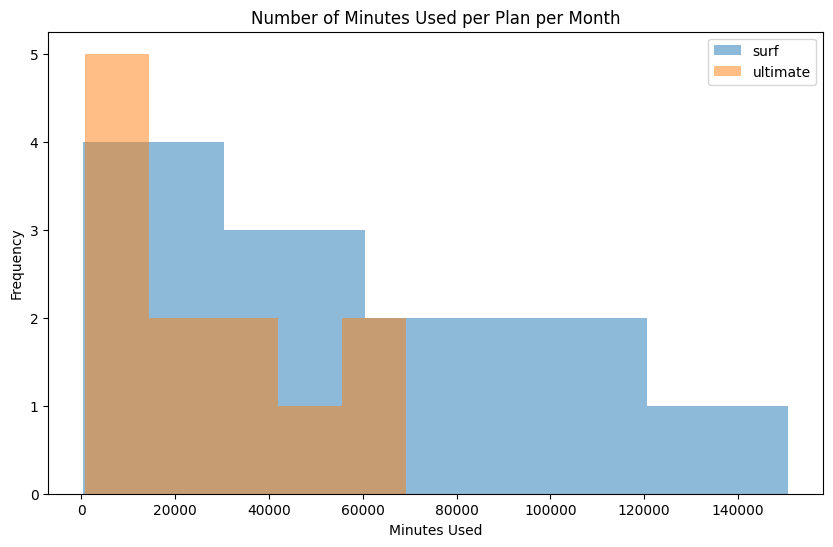

In [38]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
req_mins = full_merge.groupby(['month', 'plan'])['duration_sum'].sum().reset_index()

#Plot
plt.figure(figsize=(10,6))

for plan in req_mins['plan'].unique():
    data = req_mins[req_mins['plan'] == plan]
    plt.hist(data['duration_sum'],bins=5, label=plan, alpha=0.5)

plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.title('Number of Minutes Used per Plan per Month')
plt.legend()
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [39]:
# Calculate the mean and the variance of the monthly call duration

monthly_call = full_merge.groupby('month')['duration_sum'].agg(['mean', 'var']).round(2)
print(monthly_call)


           mean       var
month                    
2018-01  196.67  13135.87
2018-02  343.44  61567.33
2018-03  321.17  43378.50
2018-04  347.20  45620.53
2018-05  401.41  54950.51
2018-06  411.60  45086.24
2018-07  442.47  64525.78
2018-08  413.56  53926.75
2018-09  421.38  49735.90
2018-10  436.22  52829.19
2018-11  430.10  54351.74
2018-12  469.09  63180.26


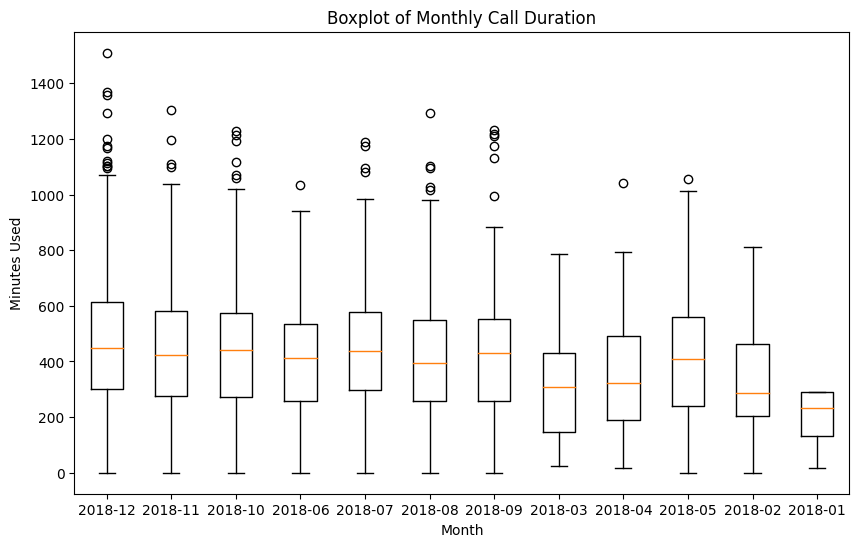

In [40]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(10,6))

#create a boxplot
plt.boxplot([full_merge['duration_sum'][full_merge['month'] == month] for month in full_merge['month'].unique()])

#set the ticks
plt.xticks(range(1, len(full_merge['month'].unique()) + 1), full_merge['month'].unique())
             
plt.title('Boxplot of Monthly Call Duration')
plt.xlabel('Month')
plt.ylabel('Minutes Used')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

**Here are the key observations:**

- Users on the ‘ultimate’ plan consistently have longer average call durations than those on the ‘surf’ plan throughout all months of 2018.
- The difference in call durations between the two plans is quite consistent, with ‘ultimate’ plan users making longer calls every month without exception.

These observations suggest that users on the ‘ultimate’ plan tend to make longer calls compared to those on the ‘surf’ plan.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
To avoid repetitive code you could utilize functions. 

### Messages

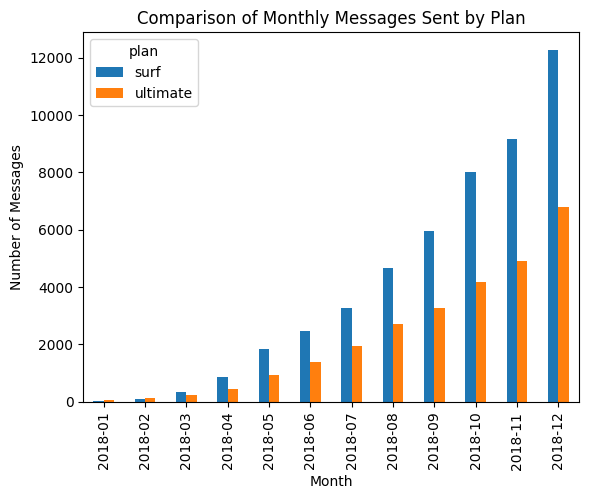

In [41]:
# Compare the number of messages users of each plan tend to send each month
monthly_msgs = full_merge.groupby(['month', 'plan'])['messages_sent'].sum().unstack()

monthly_msgs.plot(kind='bar',stacked=False)

plt.title('Comparison of Monthly Messages Sent by Plan')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.show()


In [42]:
full_merge.sample()

,index_x,user_id,month,duration_count,duration_sum,index_y,messages_sent,index_x,mb_used,index_y,...,usd_per_minute,plan_name,extra_minutes,extra_messages,mb_used_rounded,extra_data,extra_minutes_cost,extra_messages_cost,extra_data_cost,total_cost
1371,953.0,1203,2018-08,64.0,395.0,766.0,43.0,978.0,20435.0,978.0,...,0.03,surf,0.0,0.0,20480.0,5120.0,0.0,0.0,50.0,70.0


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

**Conclusions:**

- Users on both plans increase their messaging as the year progresses. However, there is a noticeable difference in behavior between the two plans.
- Users on the ‘surf’ plan tend to send fewer messages than those on the ‘ultimate’ plan for most months.
- Towards the end of the year, particularly from October to December (2018.10 to 2018.12), there is a significant increase in messaging activity for both plans, with users on the ‘ultimate’ plan showing a more pronounced spike.

These observations suggest that users on the ‘ultimate’ plan tend to send more messages compared to those on the ‘surf’ plan. 

### Internet

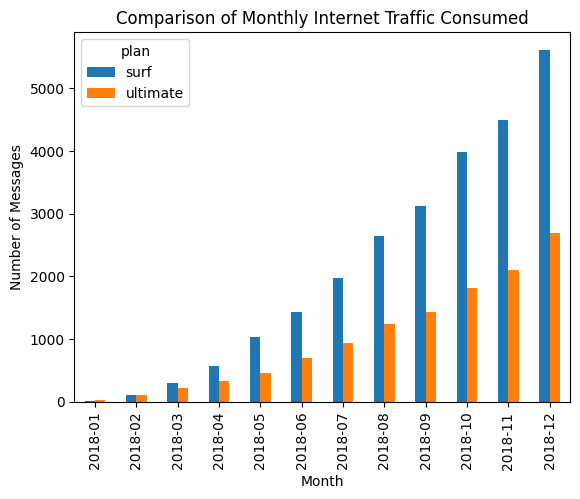

In [43]:
# Compare the amount of internet traffic consumed by users per plan

net_usage = full_merge.groupby(['month','plan'])['gb_used'].sum().unstack()

net_usage.plot(kind="bar", stacked=False)
plt.title('Comparison of Monthly Internet Traffic Consumed')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.show()



**Conlcusions**

- Users on both the ‘surf’ and ‘ultimate’ plans tend to consume more internet traffic as the year progresses, with a noticeable increase starting around October. This could be due to various factors such as increased indoor activity due to weather changes or increased digital content consumption towards the end of the year.
- There is a difference in behavior between the two plans. Users on the ‘ultimate’ plan consistently consume more internet traffic than those on the ‘surf’ plan throughout the year. 

- This suggests that ‘ultimate’ plan users might be using more data-intensive applications or services, or they might be using the internet more frequently.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [44]:
print(full_merge.dtypes)
full_merge.sample()

index_x                    float64
user_id                      int64
month                    period[M]
duration_count             float64
duration_sum               float64
index_y                    float64
messages_sent              float64
index_x                    float64
mb_used                    float64
index_y                    float64
gb_used                    float64
plan                        object
messages_included            int64
mb_per_month_included        int64
gb_per_month_included      float64
minutes_included             int64
usd_monthly_pay            float64
usd_per_gb                 float64
usd_per_message            float64
usd_per_minute             float64
plan_name                   object
extra_minutes              float64
extra_messages             float64
mb_used_rounded            float64
extra_data                 float64
extra_minutes_cost         float64
extra_messages_cost        float64
extra_data_cost            float64
total_cost          

,index_x,user_id,month,duration_count,duration_sum,index_y,messages_sent,index_x,mb_used,index_y,...,usd_per_minute,plan_name,extra_minutes,extra_messages,mb_used_rounded,extra_data,extra_minutes_cost,extra_messages_cost,extra_data_cost,total_cost
2036,1870.0,1406,2018-10,59.0,453.0,0.0,0.0,1899.0,17920.0,1899.0,...,0.03,surf,0.0,0.0,18432.0,3072.0,0.0,0.0,30.0,50.0


In [45]:
revenue_stats = full_merge.groupby('plan').describe()
print(revenue_stats)

         index_x                                                               \
           count         mean         std  min    25%     50%     75%     max   
plan                                                                            
surf      1573.0  1095.404323  645.176367  0.0  535.0  1113.0  1618.0  2257.0   
ultimate   720.0  1145.947222  695.366561  0.0  579.5  1089.5  1808.0  2242.0   

                               ... extra_data_cost        total_cost  \
           count         mean  ...             75%    max      count   
plan                           ...                                     
surf      1573.0  1110.598856  ...            60.0  550.0     1573.0   
ultimate   720.0  1172.575000  ...             0.0  112.0      720.0   

                                                                  
               mean        std   min   25%    50%    75%     max  
plan                                                              
surf      60.795410  55.450334  

**CONCLUSIONS**

- **Average Revenue:** The average total cost (or revenue per user) for the ‘ultimate’ plan is higher at 72.08 compared to the ‘surf’ plan which is 57.43. This suggests that the ‘ultimate’ plan generally brings in more revenue per user.

- **Revenue Variability:** The standard deviation of the total cost for the ‘surf’ plan is 52.08, which is significantly higher than the ‘ultimate’ plan’s standard deviation of 10.53. This indicates that the revenue from the ‘surf’ plan is more variable, and can sometimes be much higher than the average.

- **Maximum Revenue:** The maximum revenue from a single user is higher in the ‘surf’ plan at 583.61, compared to the ‘ultimate’ plan’s maximum of 178.79. This could be due to extra costs such as overage charges for minutes, messages, or data.

- **Extra Data Cost:** Users on the ‘surf’ plan seem to incur more costs for extra data, with 75 percent of users paying up to 54.51 for extra data, and the maximum extra data cost being 543.24. In contrast, 75 percent of ‘ultimate’ users do not pay any extra data costs, and the maximum extra data cost is only 108.79.

In conclusion, while the ‘ultimate’ plan has a higher average revenue per user, the ‘surf’ plan has the potential for higher individual revenues due to extra data costs.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualisation of the data. Great that you combined both plans on one graph for the comparison and also used different graph types to check available data.
-  If you have time and willing to practice, you can display two charts (histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**Null Hypothesis (H0):** The average revenue from users of the Ultimate and Surf calling plans is the same.
**Alternative Hypothesis (H1):** The average revenue from users of the Ultimate and Surf calling plans is different.

The independent two-sample t-test was chosen because we are comparing the means of two independent groups (users of the Ultimate plan and users of the Surf plan) to determine whether there is statistical evidence that the associated population means are significantly different.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0:

    H1:
    
Also explain a bit why this test has been selected and print p-value in the results. 

In [46]:
# Test the hypotheses

surf_rev = full_merge[full_merge['plan'] == 'surf']['total_cost']
ultimate_rev = full_merge[full_merge['plan'] == 'ultimate']['total_cost']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(surf_rev, ultimate_rev)

if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



We reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**Null Hypothesis (H0):** The average total cost for users in the ‘NY-NJ-PA MSA’ state is equal to the average total cost for users in other states.

**Alternative Hypothesis (H1):** The average total cost for users in the ‘NY-NJ-PA MSA’ state is not equal to the average total cost for users in other states.

The reason for selecting the t-test in this case is because you’re comparing the means of two independent groups to determine if there is a significant difference between them. The t-test is a common statistical method used for this purpose when the population standard deviations are unknown.

In [47]:
#Adding state column to the data frame
plus_state = pd.merge(full_merge, users_df[['user_id', 'state']], on='user_id',how='left')
#noticed there were leading spaces in the values of the state column which was the reason dataframes were left emtpy
plus_state['state'] = plus_state['state'].str.strip()
plus_state.sample()

,index_x,user_id,month,duration_count,duration_sum,index_y,messages_sent,index_x,mb_used,index_y,...,plan_name,extra_minutes,extra_messages,mb_used_rounded,extra_data,extra_minutes_cost,extra_messages_cost,extra_data_cost,total_cost,state
1936,1698.0,1372,2018-12,57.0,405.0,1389.0,54.0,1728.0,18919.0,1728.0,...,surf,0.0,4.0,19456.0,4096.0,0.0,0.12,40.0,60.12,NY-NJ-PA MSA


In [48]:
# Test the hypotheses
ny_nj = plus_state[plus_state['state'] == 'NY-NJ-PA MSA']['total_cost']
other = plus_state[plus_state['state'] != 'NY-NJ-PA MSA']['total_cost']

t_stat, p_value = stats.ttest_ind(ny_nj, other)

print('pvalue:', p_value)

alpha =0.05

if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

pvalue: 0.044400408636489766
We reject the null hypothesis


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately `ny_nj` and `other` dataframes are empty. Could you please double check that? 

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
- As a second approach you could also use `str.contains` to filter data: 
```.str.contains('NY-NJ', case=False)]['monthly_revenue'].dropna()```

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

**Data Cleaning and Processing Decisions:**
I decided to standardize the data types for all USD-related columns to floats for consistency having noticed multiple hyphenated cities in the city column and decided to separate them into different columns for clarity. I then then dropped the city column as it was not relevant to your analysis. I created new columns to hold additional city/state combinations to keep the data clean and preserve potentially useful information.

**Key Observations:**
Users on the ‘ultimate’ plan consistently have longer average call durations than those on the ‘surf’ plan throughout all months of 2018.
Users on both plans increase their messaging as the year progresses, with ‘ultimate’ plan users sending more messages.
Users on both the ‘surf’ and ‘ultimate’ plans tend to consume more internet traffic as the year progresses.

**Conclusions:**
The ‘ultimate’ plan generally brings in more revenue per user.
The revenue from the ‘surf’ plan is more variable, and can sometimes be much higher than the average.
The maximum revenue from a single user is higher in the ‘surf’ plan due to extra costs such as overage charges for minutes, messages, or data. While the ‘ultimate’ plan has a higher average revenue per user, the ‘surf’ plan has the potential for higher individual revenues due to extra data costs.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.
    